In [59]:
import pandas as pd
from pandas import DatetimeIndex
import pandas_datareader.data as web
import datetime  
import monthly_returns_heatmap as mrh
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import re, requests
from bs4 import BeautifulSoup

from IPython.display import HTML

In [60]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [61]:
#IMPORT Data
data = web.get_data_yahoo('SPY','01/01/2006',interval='d')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,127.000000,124.389999,125.190002,126.699997,73256700.0,97.253418
2006-01-04,127.489998,126.699997,126.860001,127.300003,51899600.0,97.713974
2006-01-05,127.589996,126.879997,127.150002,127.379997,47307500.0,97.775391
2006-01-06,128.580002,127.360001,128.020004,128.440002,62885900.0,98.589005
2006-01-09,129.059998,128.380005,128.419998,128.770004,43527400.0,98.842323


In [62]:
appl_data = data.copy()
appl_data['year'] = data.index.year
appl_data['month'] = data.index.month
appl_data['week'] = data.index.week
appl_data['dayofmonth'] = data.index.day
appl_data['dayofweek'] = data.index.dayofweek
appl_data.tail()

,High,Low,Open,Close,Volume,Adj Close,year,month,week,dayofmonth,dayofweek
Date,,,,,,,,,,,
2018-12-27,248.289993,238.960007,242.570007,248.070007,186267300.0,248.070007,2018,12,52,27,3
2018-12-28,251.399994,246.449997,249.580002,247.750000,153100200.0,247.750000,2018,12,52,28,4
2018-12-31,250.190002,247.470001,249.559998,249.919998,144299400.0,249.919998,2018,12,1,31,0
2019-01-02,251.210007,245.949997,245.979996,250.179993,126312300.0,250.179993,2019,1,1,2,2
2019-01-03,248.570007,243.669998,248.229996,244.210007,140686279.0,244.210007,2019,1,1,3,3


In [63]:
appl_data[appl_data['month']==9]

,High,Low,Open,Close,Volume,Adj Close,year,month,week,dayofmonth,dayofweek
Date,,,,,,,,,,,
2006-09-01,131.580002,130.839996,131.139999,131.419998,48794500.0,101.725220,2006,9,35,1,4
2006-09-05,131.850006,131.199997,131.509995,131.669998,52348300.0,101.918747,2006,9,36,5,1
2006-09-06,131.160004,130.330002,131.110001,130.509995,53795600.0,101.020805,2006,9,36,6,2
2006-09-07,130.570007,129.350006,130.059998,129.910004,86269400.0,100.556412,2006,9,36,7,3
2006-09-08,130.460007,129.830002,130.080002,130.279999,45096300.0,100.842812,2006,9,36,8,4
2006-09-11,130.690002,129.479996,129.860001,130.410004,68496600.0,100.943413,2006,9,37,11,0
2006-09-12,131.839996,130.369995,130.559998,131.690002,69875600.0,101.934189,2006,9,37,12,1
2006-09-13,132.449997,131.520004,131.639999,132.220001,62898400.0,102.344467,2006,9,37,13,2
2006-09-14,132.240005,131.750000,131.960007,132.229996,57805400.0,102.352211,2006,9,37,14,3


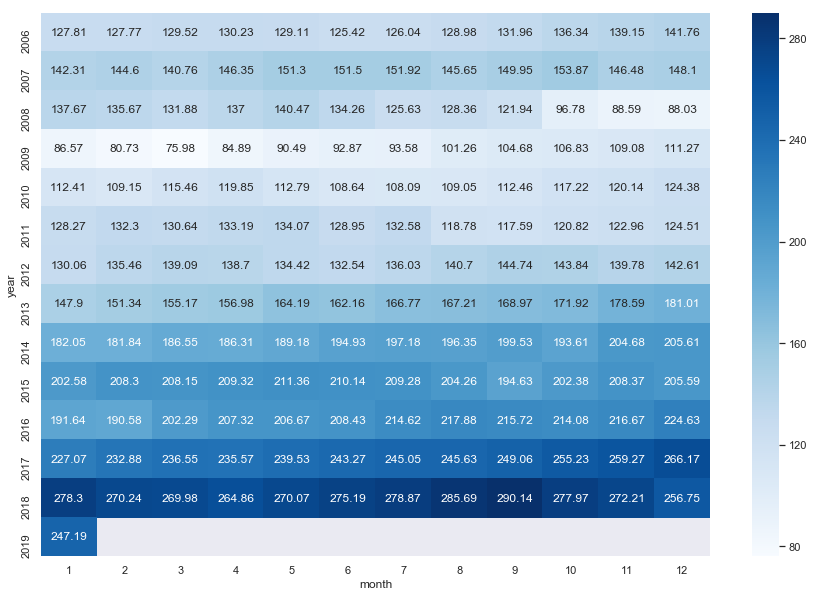

In [64]:
#WHAT MONTH IS THE BEST TIME TO BUY AND SELL?
appl_month_study = appl_data.groupby(['year', 'month'])['Close'].mean().round(2).unstack()
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(appl_month_study,annot=True,cmap='Blues', fmt='g')

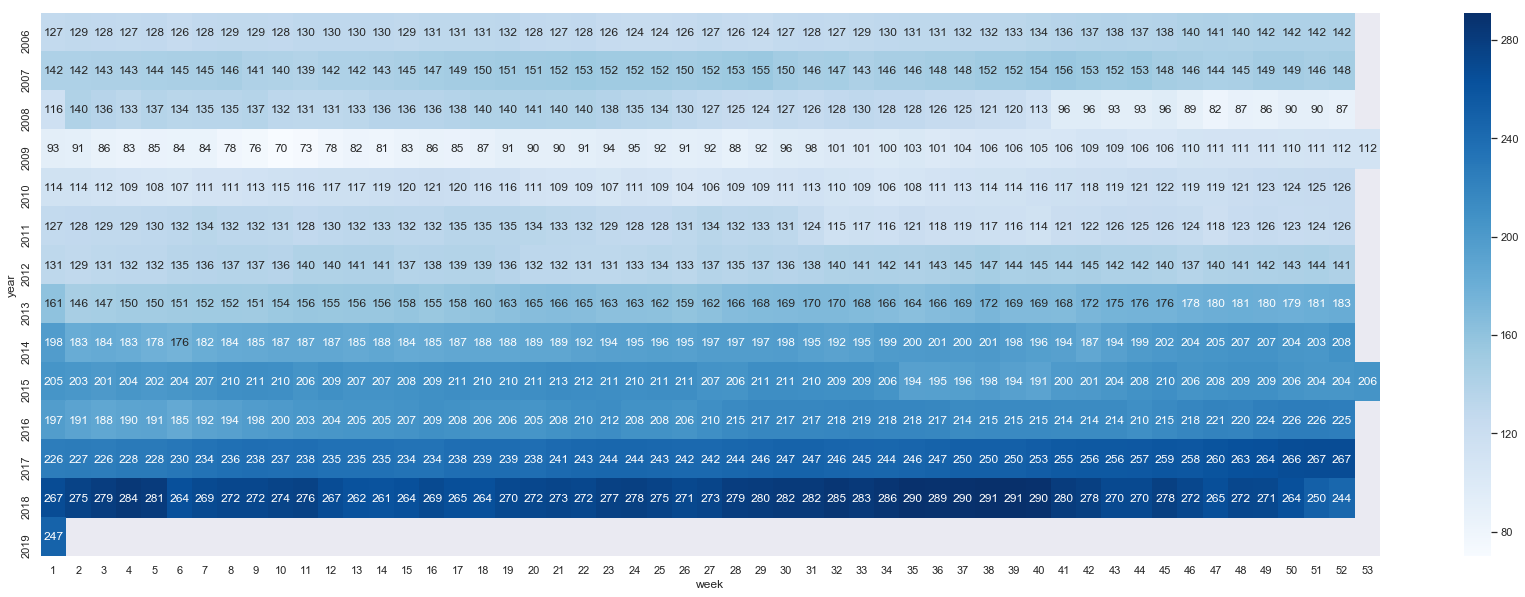

In [65]:
#WHAT WEEK IS THE BEST TIME TO BUY AND SELL?
appl_weekly_study = appl_data.groupby(['year', 'week'])['Close'].mean().round(0).unstack() #buy Week4 Sell week46 or week47
fig, ax = plt.subplots(figsize=(30,10)) 
ax = sns.heatmap(appl_weekly_study,annot=True,cmap='Blues', fmt="g")

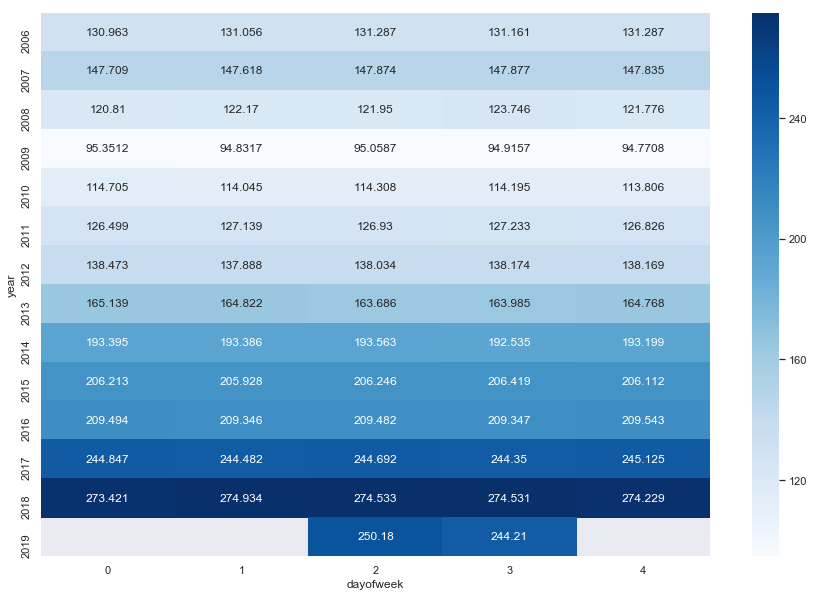

In [66]:
#WHAT DAY OF THE WEEK IS THE BEST TIME TO BUY AND SELL?
appl_day_study = appl_data.groupby(['year', 'dayofweek'])['Close'].mean().unstack()
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(appl_day_study,annot=True,cmap='Blues', fmt='g')

In [67]:
week_buy = 2
week_sell =39
investment = 100000
year_start = 2009
year_end = 2018
earning = 0
acc_earning = 0
df_result= []

for i in range(year_end-year_start +1):
    close_price_buy = appl_data.loc[(appl_data['year']==year_start) & (appl_data['week']==week_buy),['Adj Close']].mean().round(1).values[0]
    close_price_sell = appl_data.loc[(appl_data['year']==year_start) & (appl_data['week']==week_sell),['Adj Close']].mean().round(1).values[0]
    earning = ((investment/close_price_buy)*close_price_sell - investment).round(1)
    acc_earning = (acc_earning + earning).round(1)
    pct_change = ((close_price_sell-close_price_buy)/close_price_sell*100).round(1)
    df_result.append((year_start,close_price_buy,close_price_sell,investment,earning,acc_earning,pct_change))
    year_start=year_start+1

df_result = pd.DataFrame(df_result, columns=('year', 'buy_price', 'sell_price','investment','year_earning','acc_earning','yearly_return'))
df_result

,year,buy_price,sell_price,investment,year_earning,acc_earning,yearly_return
0,2009,74.5,87.8,100000,17852.3,17852.3,15.1
1,2010,95.4,96.8,100000,1467.5,19319.8,1.4
2,2011,109.0,99.8,100000,-8440.4,10879.4,-9.2
3,2012,112.0,127.2,100000,13571.4,24450.8,11.9
4,2013,129.9,152.6,100000,17475.0,41925.8,14.9
5,2014,166.1,182.0,100000,9572.5,51498.3,8.7
6,2015,187.3,181.7,100000,-2989.9,48508.4,-3.1
7,2016,179.9,206.2,100000,14619.2,63127.6,12.8
8,2017,218.3,244.0,100000,11772.8,74900.4,10.5
9,2018,270.2,288.9,100000,6920.8,81821.2,6.5


In [68]:
investment = 20000
year_start = 2010
year_end = 2018
earning = 0

close_price_buy = appl_data.loc[(appl_data['year']==year_start) & (appl_data['week']==week_buy),['Adj Close']].mean()
close_price_sell = appl_data.loc[(appl_data['year']==year_end) & (appl_data['week']==week_sell),['Adj Close']].mean()
earning = earning + ((investment/close_price_buy)*close_price_sell - investment)
print(close_price_buy,close_price_sell,earning)

Adj Close    95.368073
dtype: float64 Adj Close    288.924786
dtype: float64 Adj Close    40591.512185
dtype: float64


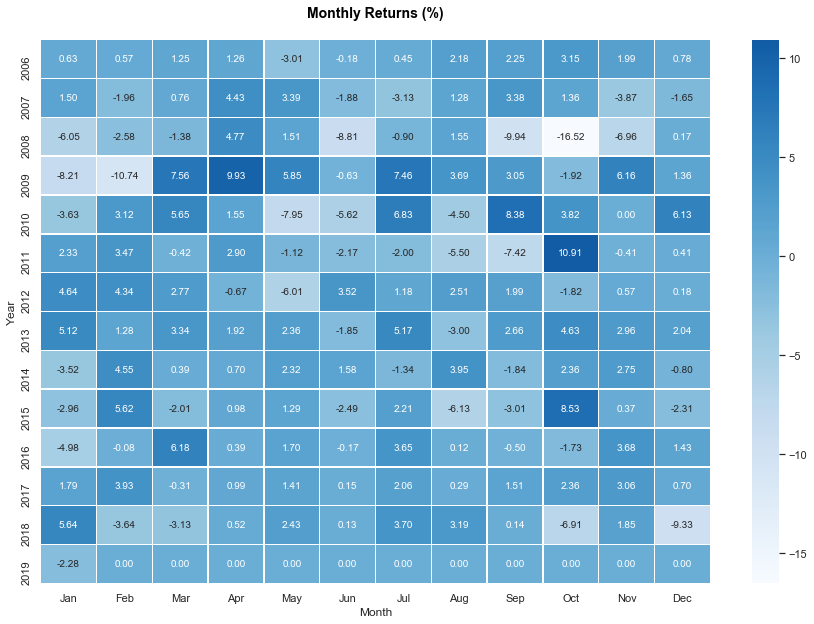

In [69]:
returns = appl_data.pct_change()
mrh.plot(returns, figsize=(15,10), cmap='Blues')